In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error


In [ ]:
df = pd.read_csv('/content/agriculture_kolar_tomato_data.csv')


In [ ]:
df.head()


,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,season,days
0,Karnataka,Kolar,Kolar,Tomato,Vegetables,598,400,1670,930,03-Jan-23,Winter,Monday
1,Karnataka,Kolar,Kolar,Tomato,Vegetables,783,330,1330,800,04-Jan-23,Winter,Saturday
2,Karnataka,Kolar,Kolar,Tomato,Vegetables,631,330,1200,530,05-Jan-23,Winter,Monday
3,Karnataka,Kolar,Kolar,Tomato,Vegetables,688,330,1330,670,06-Jan-23,Winter,Wednesday
4,Karnataka,Kolar,Kolar,Tomato,Vegetables,441,330,1270,670,07-Jan-23,Winter,Wednesday


In [ ]:
df.tail()


,State Name,District Name,Market Name,Variety,Group,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,season,days
696,Karnataka,Kolar,Kolar,Tomato,Vegetables,"1,298.00",300,1460,800,29-Dec-24,Winter,Tuesday
697,Karnataka,Kolar,Kolar,Tomato,Vegetables,"1,271.00",300,1200,660,30-Dec-24,Winter,Saturday
698,Karnataka,Kolar,Kolar,Tomato,Vegetables,781,300,1000,600,31-Dec-24,Winter,Friday
699,Karnataka,Kolar,Kolar,Tomato,Vegetables,679,300,1000,600,01-Jan-25,Winter,Tuesday
700,Karnataka,Kolar,Kolar,Tomato,Vegetables,659,300,1000,530,02-Jan-25,Winter,Monday


In [ ]:
df4 = df[['season','Price Date','Modal Price (Rs./Quintal)']]

In [ ]:
df4

,season,Price Date,Modal Price (Rs./Quintal)
0,Winter,03-Jan-23,930
1,Winter,04-Jan-23,800
2,Winter,05-Jan-23,530
3,Winter,06-Jan-23,670
4,Winter,07-Jan-23,670
...,...,...,...
696,Winter,29-Dec-24,800
697,Winter,30-Dec-24,660
698,Winter,31-Dec-24,600
699,Winter,01-Jan-25,600


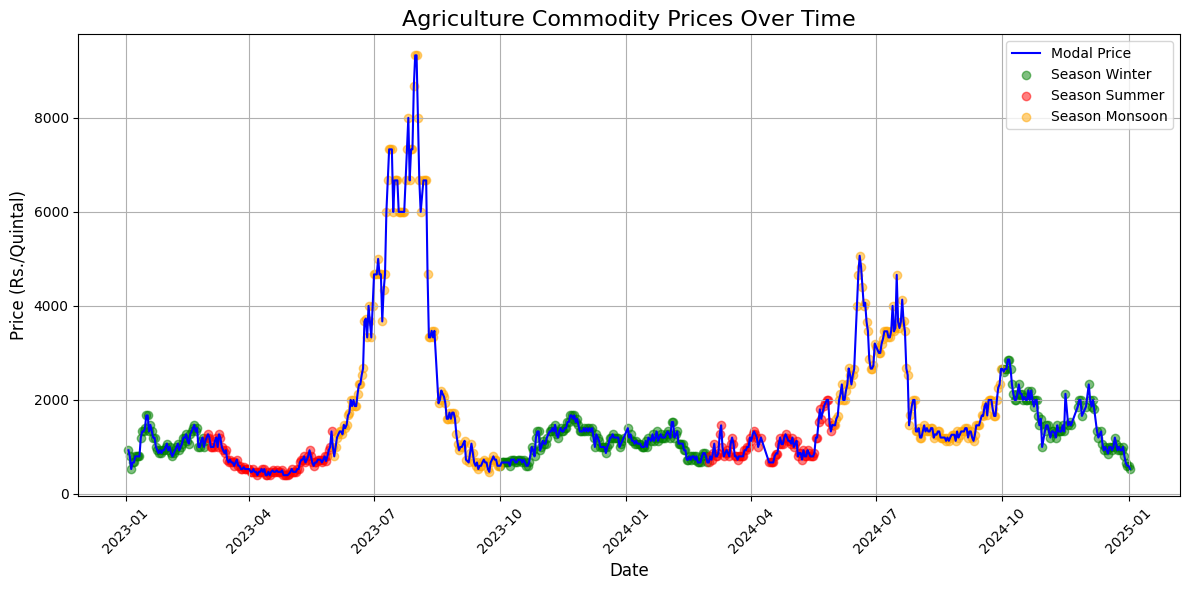

In [ ]:
# Ensure the Date column is in datetime format
df['Price Date'] = pd.to_datetime(df['Price Date'], format='%d-%b-%y')

# Plot the curve for Date vs Modal Price
plt.figure(figsize=(12, 6))
plt.plot(df['Price Date'], df['Modal Price (Rs./Quintal)'], label='Modal Price', color='blue')

# Scatter plot for each season with different colors
seasons = df['season'].unique()  # Get unique seasons
colors = ['green', 'red', 'orange', 'purple']  # You can choose more colors as per the number of seasons

for i, season in enumerate(seasons):
    season_data = df[df['season'] == season]
    plt.scatter(season_data['Price Date'], season_data['Modal Price (Rs./Quintal)'],
                label=f'Season {season}', color=colors[i], alpha=0.5)

# Adding labels, title, and legend
plt.title('Agriculture Commodity Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (Rs./Quintal)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [ ]:
df4

,season,Price Date,Modal Price (Rs./Quintal)
0,Winter,03-Jan-23,930
1,Winter,04-Jan-23,800
2,Winter,05-Jan-23,530
3,Winter,06-Jan-23,670
4,Winter,07-Jan-23,670
...,...,...,...
696,Winter,29-Dec-24,800
697,Winter,30-Dec-24,660
698,Winter,31-Dec-24,600
699,Winter,01-Jan-25,600


In [ ]:
# Select the 'Modal Price (Rs./Quintal)' column for scaling
prices = df['Modal Price (Rs./Quintal)'].values

# Apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df4 = scaler.fit_transform(prices.reshape(-1, 1))  # Scale the prices


In [ ]:
# Define training and testing sizes
training_size = int(len(df4) * 0.65)  # 65% for training
test_size = len(df4) - training_size  # Remaining 35% for testing

# Split the scaled data into training and testing datasets
train_data, test_data = df4[:training_size], df4[training_size:]

In [ ]:
training_size,test_size

(455, 246)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0017 - val_loss: 0.0031
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0017 - val_loss: 0.0034
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0012 - val_loss: 0.0029
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0016 - val_loss: 0.0032
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0014 - val_loss: 0.0035
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0015 - val_

In [ ]:
tf.__version__


'2.17.1'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
len(X_train)

424

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict) # use y_train directly instead
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

2248.298358063295

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2229.4832663630814

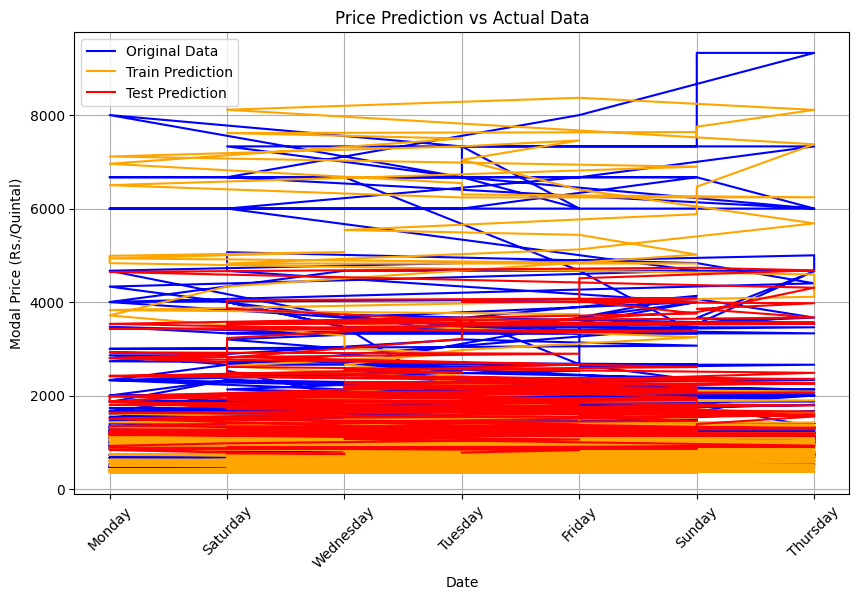

In [ ]:
### Plotting
# shift train predictions for plotting
look_back = 30
trainPredictPlot = np.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df4)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict

# Create a time array for the x-axis (dates or day numbers corresponding to the predictions)
train_dates = df['days'].iloc[look_back:len(train_predict)+look_back].values
test_dates = df['days'].iloc[len(train_predict)+(look_back*2)+1:len(df4)-1].values

# Plot the baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(df['days'], scaler.inverse_transform(df4), label='Original Data', color='blue')
plt.plot(train_dates, trainPredictPlot[look_back:len(train_predict)+look_back, :], label='Train Prediction', color='orange')
plt.plot(test_dates, testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :], label='Test Prediction', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Price Prediction vs Actual Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


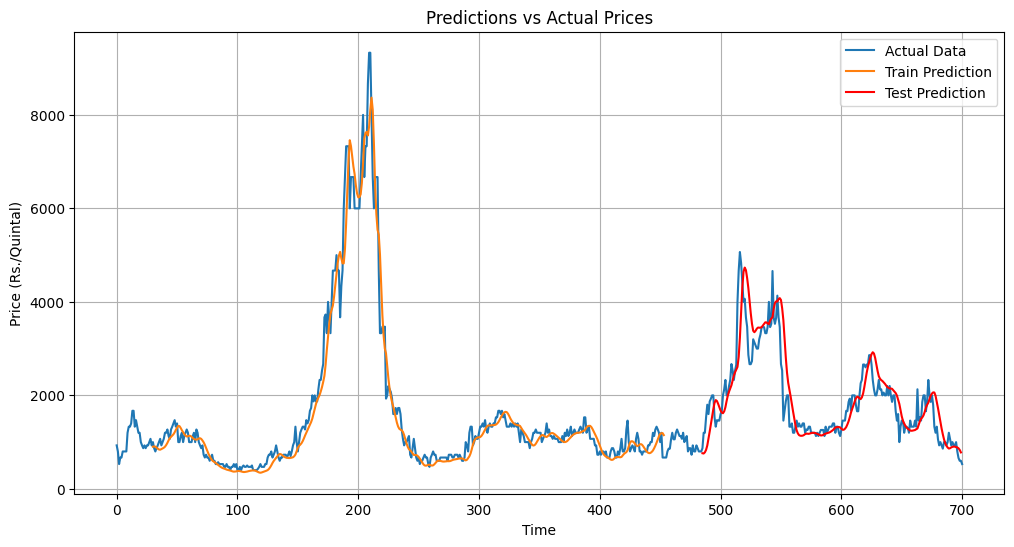

In [ ]:
# shift train predictions for plotting
look_back = 30
trainPredictPlot = np.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df4)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df4) - 1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df4), label='Actual Data')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, color='red', label='Test Prediction')
plt.title('Predictions vs Actual Prices')
plt.xlabel('Time')
plt.ylabel('Price (Rs./Quintal)')
plt.legend()
plt.grid(True)
plt.show()


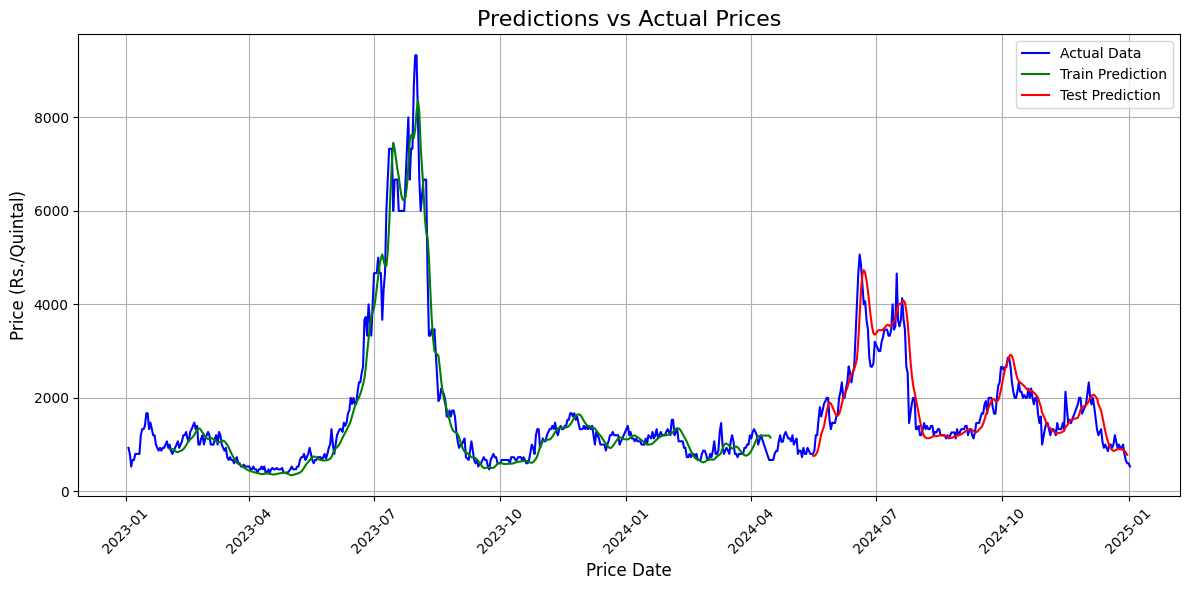

In [ ]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df4)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2):len(train_predict) + (look_back * 2) + len(test_predict), :] = test_predict

# Extract the corresponding dates for plotting
train_dates = df['Price Date'][look_back:len(train_predict) + look_back]
test_dates = df['Price Date'][len(train_predict) + (look_back * 2):len(train_predict) + (look_back * 2) + len(test_predict)]

# Plot baseline and predictions
plt.figure(figsize=(12, 6))

# Actual data
plt.plot(df['Price Date'], scaler.inverse_transform(df4), label='Actual Data', color='blue')

# Train predictions
plt.plot(train_dates, trainPredictPlot[look_back:len(train_predict) + look_back], label='Train Prediction', color='green')

# Test predictions
plt.plot(test_dates, testPredictPlot[len(train_predict) + (look_back * 2):len(train_predict) + (look_back * 2) + len(test_predict)], color='red', label='Test Prediction')

# Add labels and title
plt.title('Predictions vs Actual Prices', fontsize=16)
plt.xlabel('Price Date', fontsize=12)
plt.ylabel('Price (Rs./Quintal)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


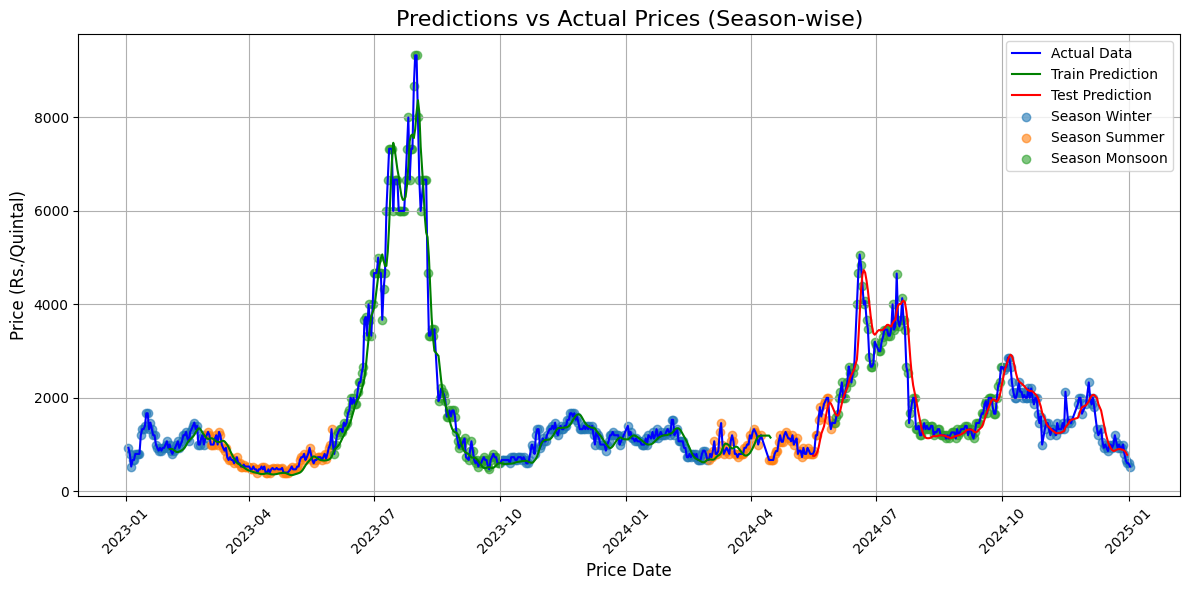

In [ ]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df4)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2):len(train_predict) + (look_back * 2) + len(test_predict), :] = test_predict

# Extract the corresponding dates for plotting
train_dates = df['Price Date'][look_back:len(train_predict) + look_back]
test_dates = df['Price Date'][len(train_predict) + (look_back * 2):len(train_predict) + (look_back * 2) + len(test_predict)]

# Plot baseline and predictions
plt.figure(figsize=(12, 6))

# Actual data
plt.plot(df['Price Date'], scaler.inverse_transform(df4), label='Actual Data', color='blue')

# Train predictions
plt.plot(train_dates, trainPredictPlot[look_back:len(train_predict) + look_back], label='Train Prediction', color='green')

# Test predictions
plt.plot(test_dates, testPredictPlot[len(train_predict) + (look_back * 2):len(train_predict) + (look_back * 2) + len(test_predict)], color='red', label='Test Prediction')

# Season-wise data points
for season in df['season'].unique():
    season_data = df[df['season'] == season]
    plt.scatter(season_data['Price Date'], season_data['Modal Price (Rs./Quintal)'], label=f'Season {season}', alpha=0.6)

# Add labels and title
plt.title('Predictions vs Actual Prices (Season-wise)', fontsize=16)
plt.xlabel('Price Date', fontsize=12)
plt.ylabel('Price (Rs./Quintal)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Define a function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Rescale y_train and ytest to their original values
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))
ytest_original = scaler.inverse_transform(ytest.reshape(-1, 1))

# Calculate MAPE for train and test sets
train_mape = mean_absolute_percentage_error(y_train_original, train_predict)
test_mape = mean_absolute_percentage_error(ytest_original, test_predict)

# Calculate accuracy as 100% - MAPE
train_accuracy = 100 - train_mape
test_accuracy = 100 - test_mape

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%")

Training Accuracy: 85.64%
Testing Accuracy: 82.72%
